# **Loading the Data**


In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the .csv files 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


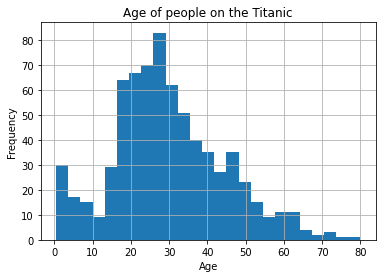

In [5]:
train_data['Age'].hist(bins = 25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of people on the Titanic')
plt.show()

In [6]:
train_data['Age'].isnull().sum() #---> 177 Null Values in the Age column

177

In [7]:
train_data.shape[0]

891

In [8]:
perc_Age_null_vals = train_data['Age'].isnull().sum()*100/train_data.shape[0] # Calculates the % null values in the age column
str(np.round(perc_Age_null_vals, 2)) +"%"

'19.87%'

In [9]:
# Describe function
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) # fillna--> fills the Null values 

In [11]:
train_data['Age'].isnull().sum()

0

# **Label Encoder**

In [12]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Model Object
train_data['Sex'] = le.fit_transform(train_data['Sex']) #---> Encodes the categorical columns 

#'''Sex --- M---F''''
#'''--------1---0'''''

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [15]:
le.classes_ #--> 0 : female, 1 : male

array(['female', 'male'], dtype=object)

In [16]:
train_data.corr() # Pearson Correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [17]:
# Check the null values again
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
perc_Cabin_Null_vals = train_data['Cabin'].isnull().sum()*100/train_data.shape[0] # Calculates the percentage null values in the cabin column
print(str(np.round(perc_Cabin_Null_vals,2)) + " %")

77.1 %


In [19]:
train_data.drop('Cabin', axis = 1, inplace = True) # Dropped the entire column

In [20]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
perc_Embarked_Null_vals = train_data['Embarked'].isnull().sum()*100/train_data.shape[0]
perc_Embarked_Null_vals

0.2244668911335578

In [22]:
train_data.dropna(inplace=True, axis=0) # Drop the null values : rows/column containing the null values

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [24]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean()) # Fills the null values

In [27]:
test_data.drop('Cabin', axis = 1, inplace = True) # Drop: drops the entire row/column

In [28]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [29]:
test_data.corr()['Fare']

PassengerId    0.008211
Pclass        -0.577147
Age            0.329071
SibSp          0.171539
Parch          0.230046
Fare           1.000000
Name: Fare, dtype: float64

In [30]:
test_data[['Pclass', 'Fare']] #Pclass as indepenent variable and Fare as my dependent variable

,Pclass,Fare
0,3,7.8292
1,3,7.0000
2,2,9.6875
3,3,8.6625
4,3,12.2875
...,...,...
413,3,8.0500
414,1,108.9000
415,3,7.2500
416,3,8.0500


In [31]:
train_data['Pclass'].shape

(889,)

In [32]:
from sklearn.linear_model import LinearRegression

# Model object
lr = LinearRegression(normalize=True)

X = train_data['Pclass'].values.reshape((-1,1)) 
y = train_data['Fare'].values.reshape((-1,1))

lr.fit(X, y) # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
test_data[test_data['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [34]:
test_data[test_data['Fare'].isnull() == True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [35]:
test_data[test_data['Fare'].isnull() == True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [36]:
lr.predict([[3]])

array([[9.62747857]])

In [37]:
test_data.fillna(9.63, inplace = True)

In [38]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # Drop the columns from the train data

In [40]:
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # Drop the same from the test data

In [41]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [42]:
pd.get_dummies(train_data['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [43]:
nominal_col = ['Embarked']
train_data = pd.concat((train_data,pd.get_dummies(train_data[nominal_col], drop_first = True)), axis = 1)

In [44]:
train_data.drop('Embarked', axis = 1, inplace = True)

In [45]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [46]:
X = train_data.drop('Survived',axis = 1) # features
y = train_data['Survived'] # target

In [47]:
X_example = train_data.drop('Survived',axis = 1)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler() # Min Max scalar

for col in X.columns:
  X[col] = ss.fit_transform(X[col].values.reshape((-1,1)))

In [50]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.307941,0.616794
1,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,-0.307941,-1.621287
2,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.307941,0.616794
3,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,-0.307941,0.616794
4,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.307941,0.616794
...,...,...,...,...,...,...,...,...
886,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,-0.384475,-0.307941,0.616794
887,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,-0.042213,-0.307941,0.616794
888,0.825209,-1.359911,0.003524,0.431350,2.006119,-0.174084,-0.307941,0.616794
889,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-0.042213,-0.307941,-1.621287


In [51]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [52]:
X_train.shape, X_test.shape

((711, 8), (178, 8))

In [53]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
151,-1.572211,-1.359911,-0.590495,0.431350,-0.474326,0.694657,-0.307941,0.616794
219,-0.373501,0.735342,0.026738,-0.475199,-0.474326,-0.434807,-0.307941,0.616794
236,-0.373501,0.735342,1.106896,0.431350,-0.474326,-0.122745,-0.307941,0.616794
300,0.825209,-1.359911,0.003524,-0.475199,-0.474326,-0.490173,3.247377,-1.621287
515,-1.572211,0.735342,1.338358,-0.475199,-0.474326,0.038738,-0.307941,0.616794
...,...,...,...,...,...,...,...,...
242,-0.373501,0.735342,-0.050416,-0.475199,-0.474326,-0.434807,-0.307941,0.616794
254,0.825209,-1.359911,0.875433,-0.475199,2.006119,-0.239265,-0.307941,0.616794
391,0.825209,0.735342,-0.667649,-0.475199,-0.474326,-0.489251,-0.307941,0.616794
668,0.825209,0.735342,1.029742,-0.475199,-0.474326,-0.484133,-0.307941,0.616794


In [54]:
y_train

151    1
219    0
236    0
300    1
515    0
      ..
242    0
254    0
391    1
668    0
845    0
Name: Survived, Length: 711, dtype: int64

# **Machine Learning Modelling**

In [55]:
# Baseline agorithm : KNN

X_train.shape, y_train.shape

((711, 8), (711,))

In [56]:
from sklearn.base import clone

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # This is for hyperparamter tuning
from sklearn.metrics import accuracy_score # to mesasure the accuracy of the model
from sklearn.neighbors import KNeighborsClassifier # To use the knn algorithm

# KNN--> K- Nearest negihbors
knn = KNeighborsClassifier() 

# Set parameters
n_neighbors = list(np.arange(3, 200, 2)) #---> last element
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1,2] #--> Distance: Euclidean and Manhattan

# dictonary for parameters
params = {'n_neighbors' : n_neighbors,
          'weights' : weights,
          'algorithm' : algorithm,
          'p' : p
          }

# RSCV                  model parameters score
GSCV_Knn = GridSearchCV(knn, params, scoring='accuracy', n_jobs=-1, cv = 5, verbose=1) # n_iter = 20

# FIt the model
GSCV_Knn.fit(X_train, y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 7920 out of 7920 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [58]:
GSCV_Knn.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [59]:
KNN_best_model = clone(GSCV_Knn.best_estimator_)

In [60]:
KNN_best_model # best KNN modell

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [61]:
GSCV_Knn.score(X_test, y_test)*100

83.70786516853933

In [63]:
 list(np.arange(2, 200, 2))

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198]

In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


# Model object
lr = LogisticRegression()

# set params
penalty = ['l1', 'l2', 'elastic']
C = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
max_iter = list(np.arange(100, 200, 10))

# parmaeter dictionary
set_params = {"penalty" : penalty,
              "C" : C,
              "max_iter" : max_iter
              }

# RSCV
GSCV_lr = GridSearchCV(lr, set_params, scoring = 'accuracy', n_jobs= -1, cv = 5)

# Fit the model
GSCV_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0,
                               5.0],
                         'max_iter': [100, 110, 120, 130, 140, 150, 160, 170,
                                      180, 190],
                         'penalty': ['l1', 'l2', 'elastic']},
             pre_dispatch='2*n_jobs', refit=True, 

In [65]:
GSCV_lr.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
lr_best_model = clone(GSCV_lr.best_estimator_)

In [67]:
GSCV_lr.score(X_test, y_test)*100

81.46067415730337

In [68]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

# model object 
dt_clf = DecisionTreeClassifier()

# set hyperparameters
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = list(np.arange(5, 500, 5))
min_samples_split = list(np.arange(1, 10))
min_samples_leaf = list(np.arange(1, 20))
max_features = ['auto', 'sqrt', 'log2']
max_features.append(None)

# Set Parameters
params = { "criterion" : criterion,
           "splitter" : splitter,
           "max_depth" : max_depth,
           "min_samples_split" :min_samples_split,
           "min_samples_leaf" : min_samples_leaf,
           "max_features" : max_features
}

# RSCV
RSCV_dt = RandomizedSearchCV(dt_clf, params, 20, scoring='accuracy', n_jobs = 1, cv = 5, random_state=42)
# fit the mode
RSCV_dt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [69]:
dt_best_model = clone(RSCV_dt.best_estimator_)

In [70]:
RSCV_dt.score(X_test, y_test)

0.8258426966292135

In [72]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
svm_clf.score(X_test, y_test)

0.8258426966292135

In [74]:
from sklearn.ensemble import VotingClassifier


estimators = [('knn', KNN_best_model), ('lr', lr_best_model), ('dt', dt_best_model), ('rf', rf_clf), ('svm', svm_clf)]
vc = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=9,
                                                   p=2, weights='uniform')),
                             ('lr',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                            

In [75]:
vc.score(X_test, y_test)

0.8426966292134831

In [76]:
predictions = vc.predict(X_test)

accuracy_score(y_test, predictions)

0.8426966292134831

In [77]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()

adb.fit(X_train, y_train)
adb.score(X_test, y_test)

0.7865168539325843

# **Feature Selection**

In [79]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.307941,0.616794
1,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,-0.307941,-1.621287
2,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.307941,0.616794
3,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,-0.307941,0.616794
4,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.307941,0.616794
...,...,...,...,...,...,...,...,...
886,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,-0.384475,-0.307941,0.616794
887,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,-0.042213,-0.307941,0.616794
888,0.825209,-1.359911,0.003524,0.431350,2.006119,-0.174084,-0.307941,0.616794
889,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-0.042213,-0.307941,-1.621287


In [80]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [81]:
sfm = SelectFromModel(Lasso())
sfm.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [82]:
sfm.get_support()

array([False, False, False, False, False, False, False, False])

In [83]:
dt_best_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=215, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [84]:
dt_best_model.feature_importances_

array([0.23922877, 0.49677899, 0.09682801, 0.04680666, 0.02017293,
       0.05935356, 0.00405037, 0.03678072])

In [88]:
X.drop(columns_to_drop, axis = 1, inplace = True)

In [89]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y)

In [90]:
svm_clf.fit(X_train_1, y_train_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
svm_clf.score(X_test_1, y_test_1)

0.8385650224215246